# Multiple Linear Regression
## Demand for shared bikes Case Study

#### Problem Statement:

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

Data Preparation:

You can observe in the dataset that some of the variables like 'weathersit' and 'season' have values as 1, 2, 3, 4 which have specific labels associated with them (as can be seen in the data dictionary). These numeric values associated with the labels may indicate that there is some order to them - which is actually not the case (Check the data dictionary and think why). So, it is advisable to convert such feature values into categorical string values before proceeding with model building. Please refer the data dictionary to get a better understanding of all the independent variables.
 
You might notice the column 'yr' with two values 0 and 1 indicating the years 2018 and 2019 respectively. At the first instinct, you might think it is a good idea to drop this column as it only has two values so it might not be a value-add to the model. But in reality, since these bike-sharing systems are slowly gaining popularity, the demand for these bikes is increasing every year proving that the column 'yr' might be a good variable for prediction. So think twice before dropping it. 


=========================================
Dataset characteristics
=========================================	
day.csv have the following fields:
	
	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered
	

**So interpretation is important!**

## Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and read the bike dataset

In [617]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [618]:
import numpy as np
import pandas as pd

In [619]:
bike_data = pd.read_csv("day.csv")

In [620]:
# Check the head of the dataset
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Inspect the various aspects of the housing dataframe

In [621]:
bike_data.shape

(730, 16)

In [622]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [623]:
bike_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Remove unwanted columns
Removing instant, dteday as there is already month, yr.
Removing casual and registered also , we need the cnt irrespective of this.

In [624]:
bike_data_selected_columns = bike_data.drop(['instant', 'dteday', 'casual', 'registered'], axis=1)

In [625]:
bike_data_selected_columns.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


### Convert columns to categorical

In [626]:
bike_data_selected_columns.season=bike_data_selected_columns.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

bike_data_selected_columns.weathersit=bike_data_selected_columns.weathersit.map({1:'Clear', 2:'Mist', 3:'Snow', 4:'Rainy'})

bike_data_selected_columns.mnth=bike_data_selected_columns.mnth.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

bike_data_selected_columns.weekday=bike_data_selected_columns.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

bike_data_selected_columns.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


## Step 3: Visualising the Data

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

In [627]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

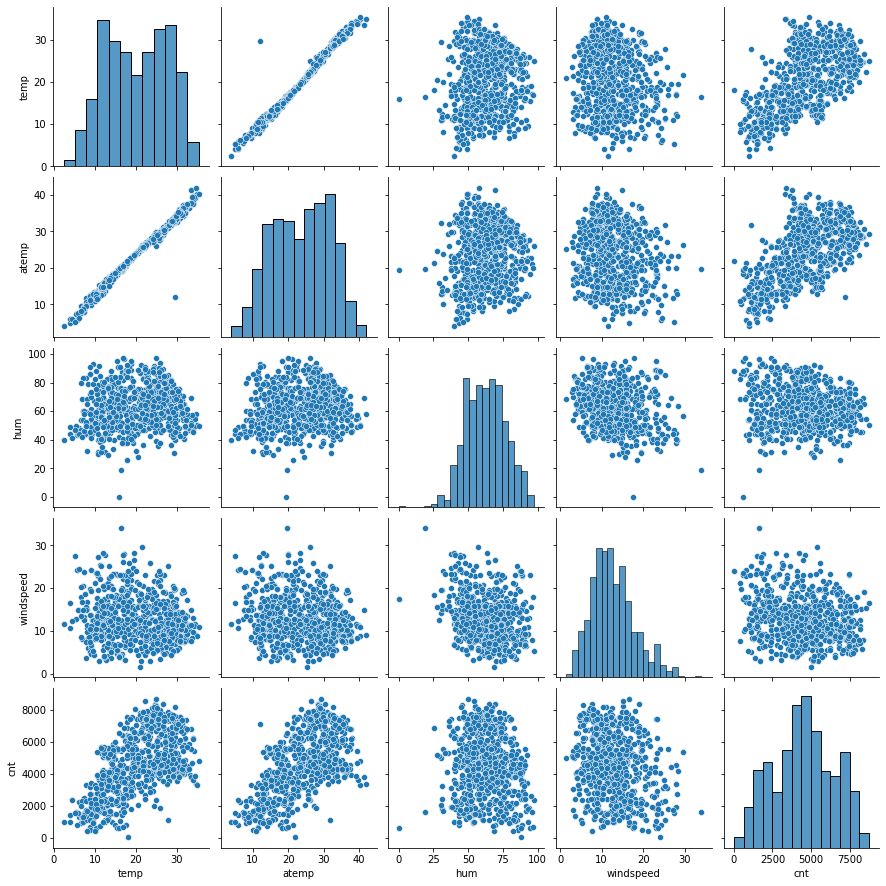

In [628]:
bike_data_numerical_columns = ['temp', 'atemp','hum', 'windspeed','cnt']
sns.pairplot(bike_data_selected_columns[bike_data_numerical_columns])
plt.show()

#### Visualising Categorical Variables

As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

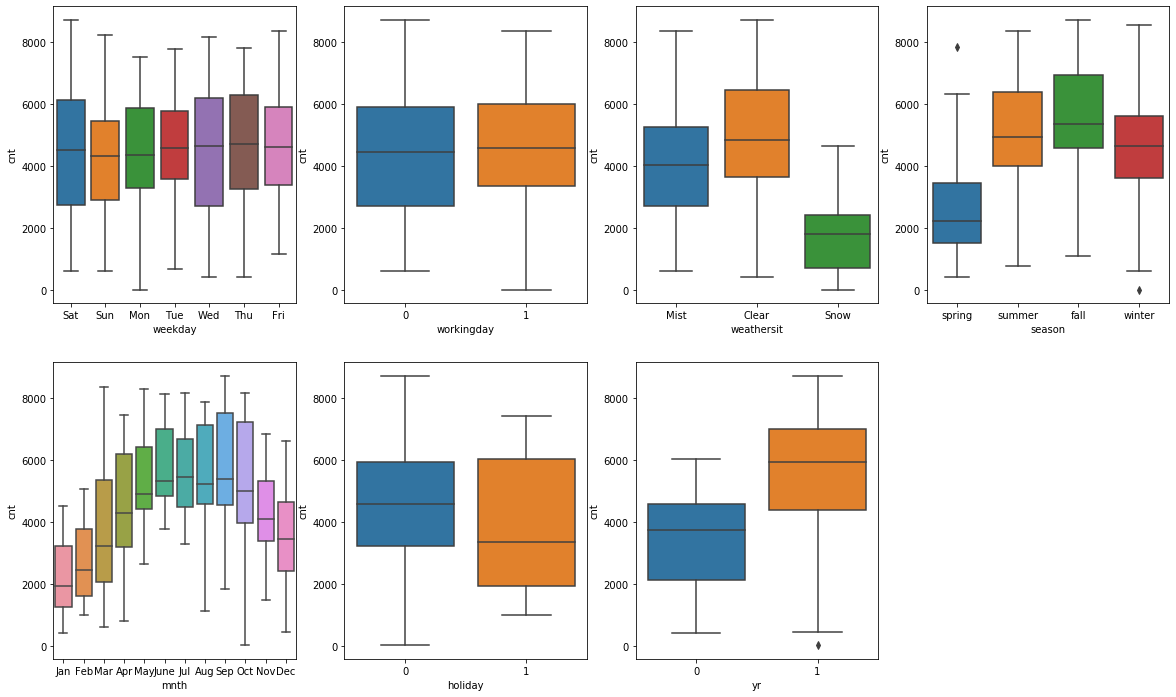

In [629]:
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_data_selected_columns)
plt.subplot(2,4,2)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_data_selected_columns)
plt.subplot(2,4,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_data_selected_columns)
plt.subplot(2,4,4)
sns.boxplot(x = 'season', y = 'cnt', data = bike_data_selected_columns)
plt.subplot(2,4,5)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_data_selected_columns)
plt.subplot(2,4,6)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_data_selected_columns)
plt.subplot(2,4,7)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_data_selected_columns)
plt.show()

## Step 4: Data Preparation

### Dummy Variables

In [630]:
# Get the dummy variables for the categorical variables

bike_data_dummy_columns = ['mnth', 'weekday', 'weathersit', 'season']
bike_data_dropped = pd.get_dummies(bike_data_selected_columns[bike_data_dummy_columns], drop_first=True)
bike_data_combined_dummies = pd.concat([bike_data_selected_columns,bike_data_dropped],axis=1)
bike_data_combined_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   season           730 non-null    object 
 1   yr               730 non-null    int64  
 2   mnth             730 non-null    object 
 3   holiday          730 non-null    int64  
 4   weekday          730 non-null    object 
 5   workingday       730 non-null    int64  
 6   weathersit       730 non-null    object 
 7   temp             730 non-null    float64
 8   atemp            730 non-null    float64
 9   hum              730 non-null    float64
 10  windspeed        730 non-null    float64
 11  cnt              730 non-null    int64  
 12  mnth_Aug         730 non-null    uint8  
 13  mnth_Dec         730 non-null    uint8  
 14  mnth_Feb         730 non-null    uint8  
 15  mnth_Jan         730 non-null    uint8  
 16  mnth_Jul         730 non-null    uint8  
 17  mnth_June       

In [631]:
# Drop  ['mnth', 'weekday', 'weathersit', 'season'] as we have created the dummies for it
bike_data_combined_dummies.drop(bike_data_dummy_columns, axis = 1, inplace = True)

In [632]:
bike_data_combined_dummies.describe()


,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,mnth_Aug,mnth_Dec,...,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Mist,weathersit_Snow,season_spring,season_summer,season_winter
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849,0.084932,0.084932,...,0.143836,0.143836,0.142466,0.142466,0.141096,0.336986,0.028767,0.246575,0.252055,0.243836
std,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647,0.278971,0.278971,...,0.351164,0.351164,0.349767,0.349767,0.348359,0.473004,0.167266,0.431313,0.434490,0.429689
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Step 4: Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [633]:
bike_data_final = bike_data_combined_dummies

In [634]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bike_data_final, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features 

As you saw in the demonstration for Simple Linear Regression, scaling doesn't impact your model. Here we can see numerical columns have different type of values. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As you know, there are two common ways of rescaling:

1. Min-Max scaling 
2. Standardisation (mean-0, sigma-1) 

This time, we will use MinMax scaling.

In [635]:
from sklearn.preprocessing import MinMaxScaler

In [636]:
scaler = MinMaxScaler()

In [637]:
# Apply scaler() to all the columns except the categorical variables
num_vars = ['temp', 'atemp','hum', 'windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [638]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,mnth_Aug,mnth_Dec,...,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Mist,weathersit_Snow,season_spring,season_summer,season_winter
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,0,0,0,1,0,0,0,0,0,1
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,1,0,0,0,0,1,0,1,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,1,0,0,0,0,1,0,0,1,0


In [639]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,mnth_Aug,mnth_Dec,...,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Mist,weathersit_Snow,season_spring,season_summer,season_winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.096078,0.084314,...,0.154902,0.143137,0.133333,0.131373,0.158824,0.343137,0.029412,0.243137,0.245098,0.24902
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.294988,0.278131,...,0.362166,0.350557,0.340268,0.338139,0.365870,0.475223,0.169124,0.429398,0.430568,0.43287
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


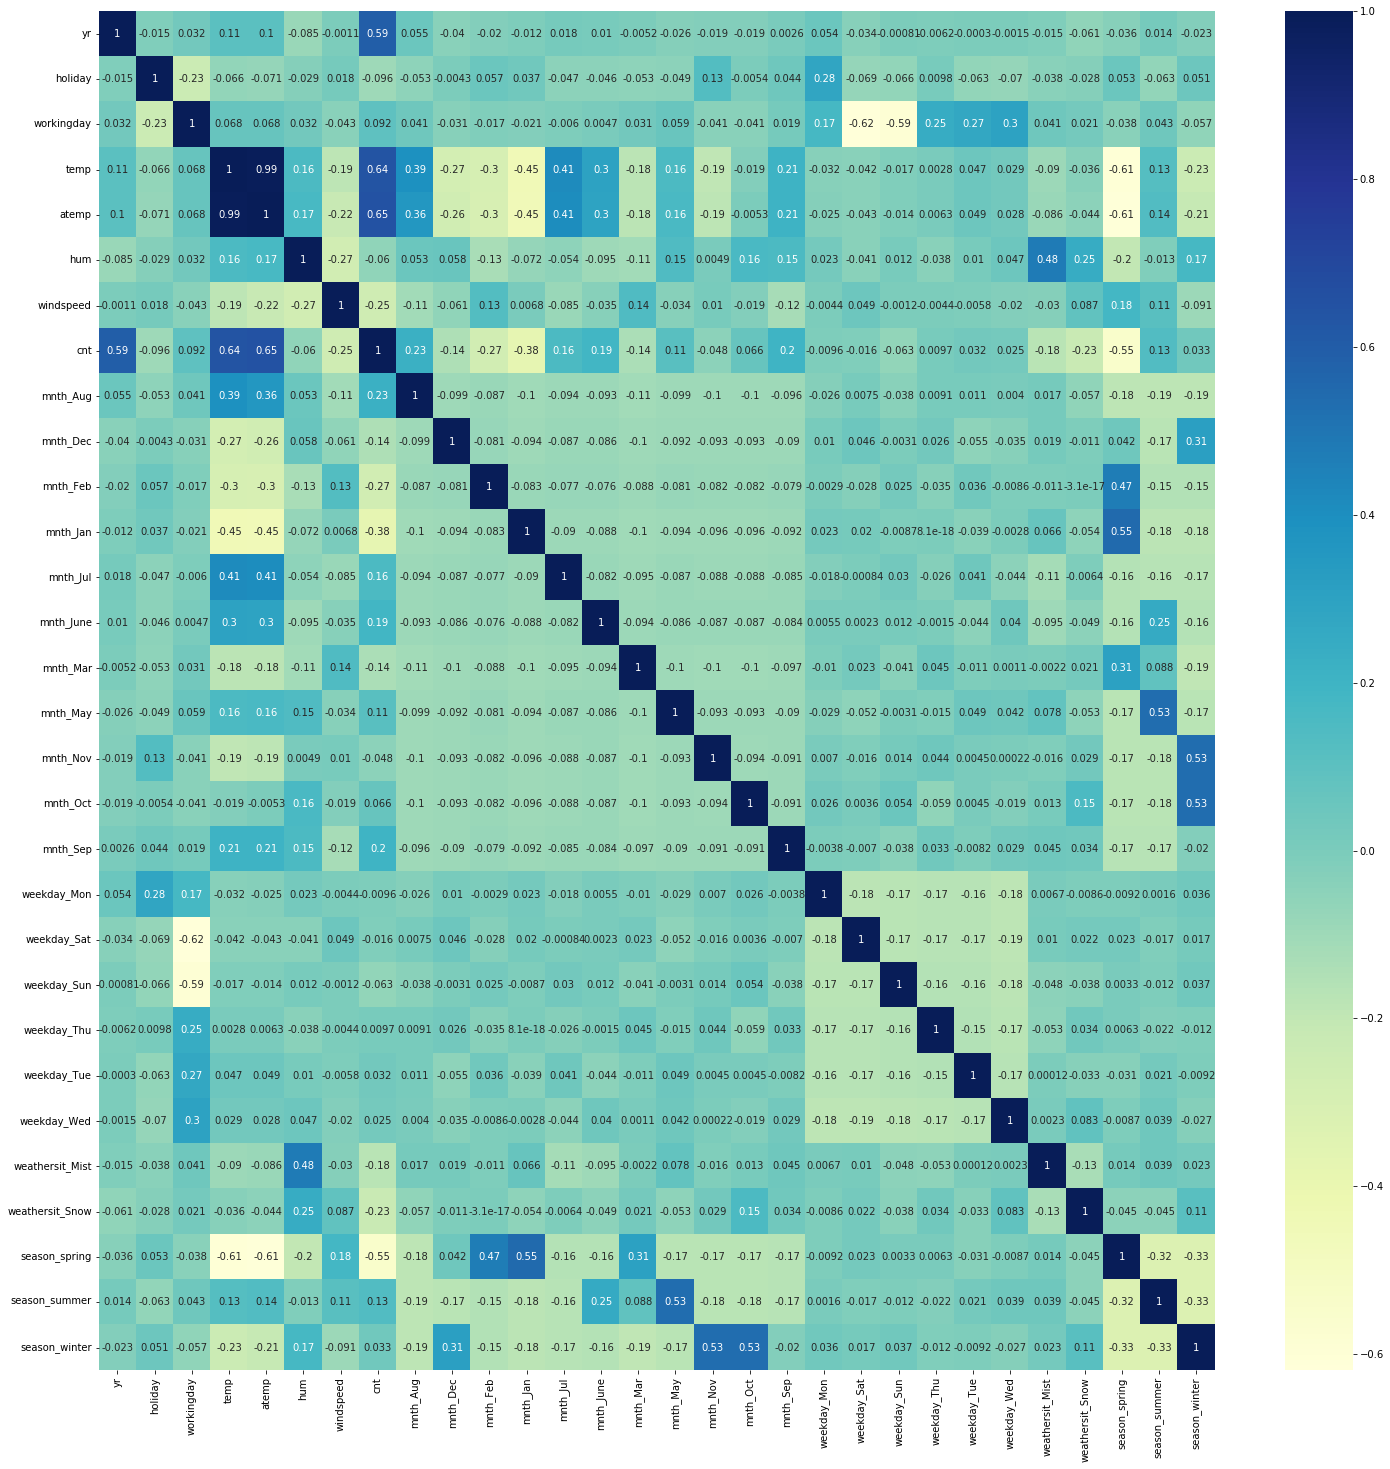

In [640]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25, 25))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

#### Dropping variables with high collinearity 

In [641]:
# We see temp and atemp have 0.99 correlation hence dropping it
df_train.drop(['atemp'], axis = 1, inplace = True)

In [642]:
df_train.head(5)

,yr,holiday,workingday,temp,hum,windspeed,cnt,mnth_Aug,mnth_Dec,mnth_Feb,...,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Mist,weathersit_Snow,season_spring,season_summer,season_winter
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,0,...,0,0,0,1,0,0,0,0,0,1
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,0,0,0,...,1,0,0,0,0,1,0,1,0,0
728,1,0,0,0.245101,0.498067,0.663106,0.204096,0,1,0,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,0,0,...,1,0,0,0,0,1,0,0,1,0


### Dividing into X and Y sets for the model building

In [643]:
y_train = df_train.pop('cnt') 
X_train = df_train

## Model Building

In [644]:
# Importing RFE and LinearRegression

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [645]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm,n_features_to_select= 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [646]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('mnth_Aug', False, 11),
 ('mnth_Dec', False, 3),
 ('mnth_Feb', False, 5),
 ('mnth_Jan', False, 2),
 ('mnth_Jul', True, 1),
 ('mnth_June', False, 9),
 ('mnth_Mar', False, 12),
 ('mnth_May', False, 6),
 ('mnth_Nov', False, 4),
 ('mnth_Oct', False, 14),
 ('mnth_Sep', True, 1),
 ('weekday_Mon', False, 7),
 ('weekday_Sat', True, 1),
 ('weekday_Sun', True, 1),
 ('weekday_Thu', False, 10),
 ('weekday_Tue', False, 8),
 ('weekday_Wed', False, 13),
 ('weathersit_Mist', True, 1),
 ('weathersit_Snow', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1)]

In [647]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'mnth_Jul',
       'mnth_Sep', 'weekday_Sat', 'weekday_Sun', 'weathersit_Mist',
       'weathersit_Snow', 'season_spring', 'season_summer', 'season_winter'],
      dtype='object')

In [648]:
X_train.columns[~rfe.support_]

Index(['mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_June', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'weekday_Mon', 'weekday_Thu',
       'weekday_Tue', 'weekday_Wed'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

#### Model1

In [649]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [650]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [651]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [652]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Sat, 12 Nov 2022   Prob (F-statistic):          1.13e-191
Time:                        15:59:05   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1989      0.028     

In [653]:
# Calculate VIF for Model 1
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
X = X.drop(['const'], axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,50.69
8,weekday_Sat,12.20
9,weekday_Sun,11.79
12,season_spring,5.02
3,temp,3.62
14,season_winter,3.49
1,holiday,2.91
13,season_summer,2.61
4,hum,1.91
10,weathersit_Mist,1.57


In [654]:
# dropping the holiday column since p value(0.373) is greater than 0.05
X_train_new = X_train_rfe.drop(["holiday"], axis = 1)

#### Model 2 Creating  a model after dropping holiday

In [655]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [656]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [657]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Sat, 12 Nov 2022   Prob (F-statistic):          1.13e-191
Time:                        15:59:05   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1799      0.042     

In [658]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
X = X.drop(['const'], axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,32.14
2,temp,18.98
1,workingday,18.41
7,weekday_Sat,4.91
4,windspeed,4.90
11,season_spring,4.80
8,weekday_Sun,4.76
13,season_winter,3.71
12,season_summer,3.03
9,weathersit_Mist,2.31


In [659]:
# dropping hum as it has VIF 32.14

In [660]:
X_train_new = X_train_new.drop(["hum"], axis = 1)

#### Model 3 Creating  a model after dropping hum

In [661]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [662]:
lm = sm.OLS(y_train,X_train_lm).fit()  

In [663]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.0
Date:                Sat, 12 Nov 2022   Prob (F-statistic):          5.73e-189
Time:                        15:59:05   Log-Likelihood:                 508.65
No. Observations:                 510   AIC:                            -989.3
Df Residuals:                     496   BIC:                            -930.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1005      0.038     

In [664]:
# calculate VIF, p value is almost 0.
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
X = X.drop(['const'], axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,workingday,16.19
2,temp,12.73
3,windspeed,4.75
6,weekday_Sat,4.45
7,weekday_Sun,4.21
10,season_spring,3.82
12,season_winter,2.80
11,season_summer,2.75
0,yr,2.07
4,mnth_Jul,1.60


In [665]:
# dropping workingday as it has high VIF workingday
X_train_new = X_train_new.drop(["workingday"], axis = 1)

#### Model 4 Creating  a model after dropping workingday

In [666]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [667]:
lm = sm.OLS(y_train,X_train_lm).fit()  

In [668]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.1
Date:                Sat, 12 Nov 2022   Prob (F-statistic):          1.01e-186
Time:                        15:59:05   Log-Likelihood:                 500.52
No. Observations:                 510   AIC:                            -975.0
Df Residuals:                     497   BIC:                            -920.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2005      0.030     

In [669]:
# calculate VIF, p value is almost 0.
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
X = X.drop(['const'], axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,5.17
2,windspeed,4.62
10,season_summer,2.23
9,season_spring,2.11
0,yr,2.07
11,season_winter,1.82
3,mnth_Jul,1.59
7,weathersit_Mist,1.55
4,mnth_Sep,1.33
5,weekday_Sat,1.22


In [670]:
# Dropping weekday_Sat as it has p value 0.171 >0.05
X_train_new = X_train_new.drop(["weekday_Sat"], axis = 1)

#### Model 5 Creating  a model after dropping weekday_Sat

In [671]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [672]:
lm = sm.OLS(y_train,X_train_lm).fit()  

In [673]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.8
Date:                Sat, 12 Nov 2022   Prob (F-statistic):          1.65e-187
Time:                        15:59:05   Log-Likelihood:                 499.56
No. Observations:                 510   AIC:                            -975.1
Df Residuals:                     498   BIC:                            -924.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2036      0.030     

In [674]:
# calculate VIF, p value is almost 0.
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
X = X.drop(['const'], axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,5.13
2,windspeed,4.60
9,season_summer,2.22
8,season_spring,2.09
0,yr,2.07
10,season_winter,1.80
3,mnth_Jul,1.59
6,weathersit_Mist,1.55
4,mnth_Sep,1.33
5,weekday_Sun,1.17


#### We conclude that above model is the final model since P values are all less than 0.05 and also all features have VIF  value less than 10

## Assumption of Normally Distributed Error Terms
### 1. Residual Analysis of the train data - Error is normally distributed

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [675]:
y_train_cnt = lm.predict(X_train_lm)

In [676]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

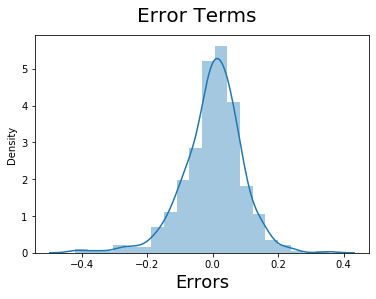

In [677]:
#Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

##### Assumption of Normally Distributed Error Terms is confirmed from above plot

### 2. Assumption of Error Terms Being Independent

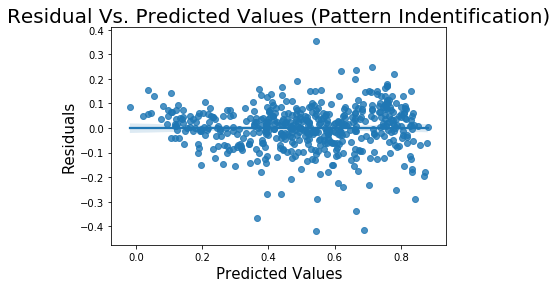

In [678]:
sns.regplot(x=y_train_cnt, y=y_train - y_train_cnt)
plt.title('Residual Vs. Predicted Values (Pattern Indentification)', fontdict={'fontsize': 20})
plt.xlabel('Predicted Values', fontdict={'fontsize': 15})
plt.ylabel('Residuals', fontdict={'fontsize': 15})
plt.show()

#####  From the above plot, we see that there is almost no relation between Residual & Predicted Value. This is what we had expected from our model to have no specific pattern.

## Making Predictions

#### Applying the scaling on the test sets

In [679]:
# Apply scaler() to all the columns except the categorical variables
num_vars = ['temp', 'atemp','hum', 'windspeed','cnt']

df_test[num_vars] = scaler.fit_transform(df_test[num_vars])
df_test.pop('atemp')

184    0.778767
535    0.855132
299    0.492359
221    0.805661
152    0.749249
         ...   
400    0.227731
702    0.508864
127    0.577423
640    0.687659
72     0.320482
Name: atemp, Length: 219, dtype: float64

#### Dividing into X_test and y_test

In [680]:
y_test = df_test.pop('cnt')
X_test = df_test

In [681]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_train_new = X_train_new.drop(['const'], axis=1)

X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [682]:
# Making predictions
y_pred = lm.predict(X_test_new)

## Model Evaluation 

Text(0, 0.5, 'y_pred')

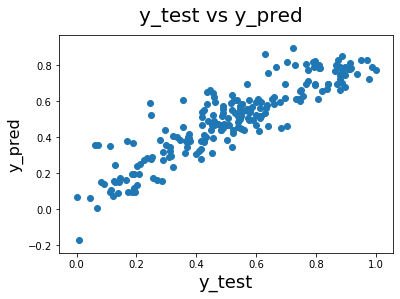

In [683]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

##### Above Scatter Plot Shows Linear Relationship between Actual Test Data Points & Predicted Test Data Points


## R^2 Value for TEST

In [684]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(r2)

0.7956146157381652


### We have R2 Value as 0.7956